# California House Price prediction

- Criterion (target) - median_house_value

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/hrishinandanmacbook/Developer/ML/001/housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df = data.copy()

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- Data Preprocessing

In [8]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
df.shape

(20433, 10)

- Dropped Missing values

In [12]:
df.duplicated().sum()

np.int64(0)

- No Duplicates

In [13]:
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(exclude='number')

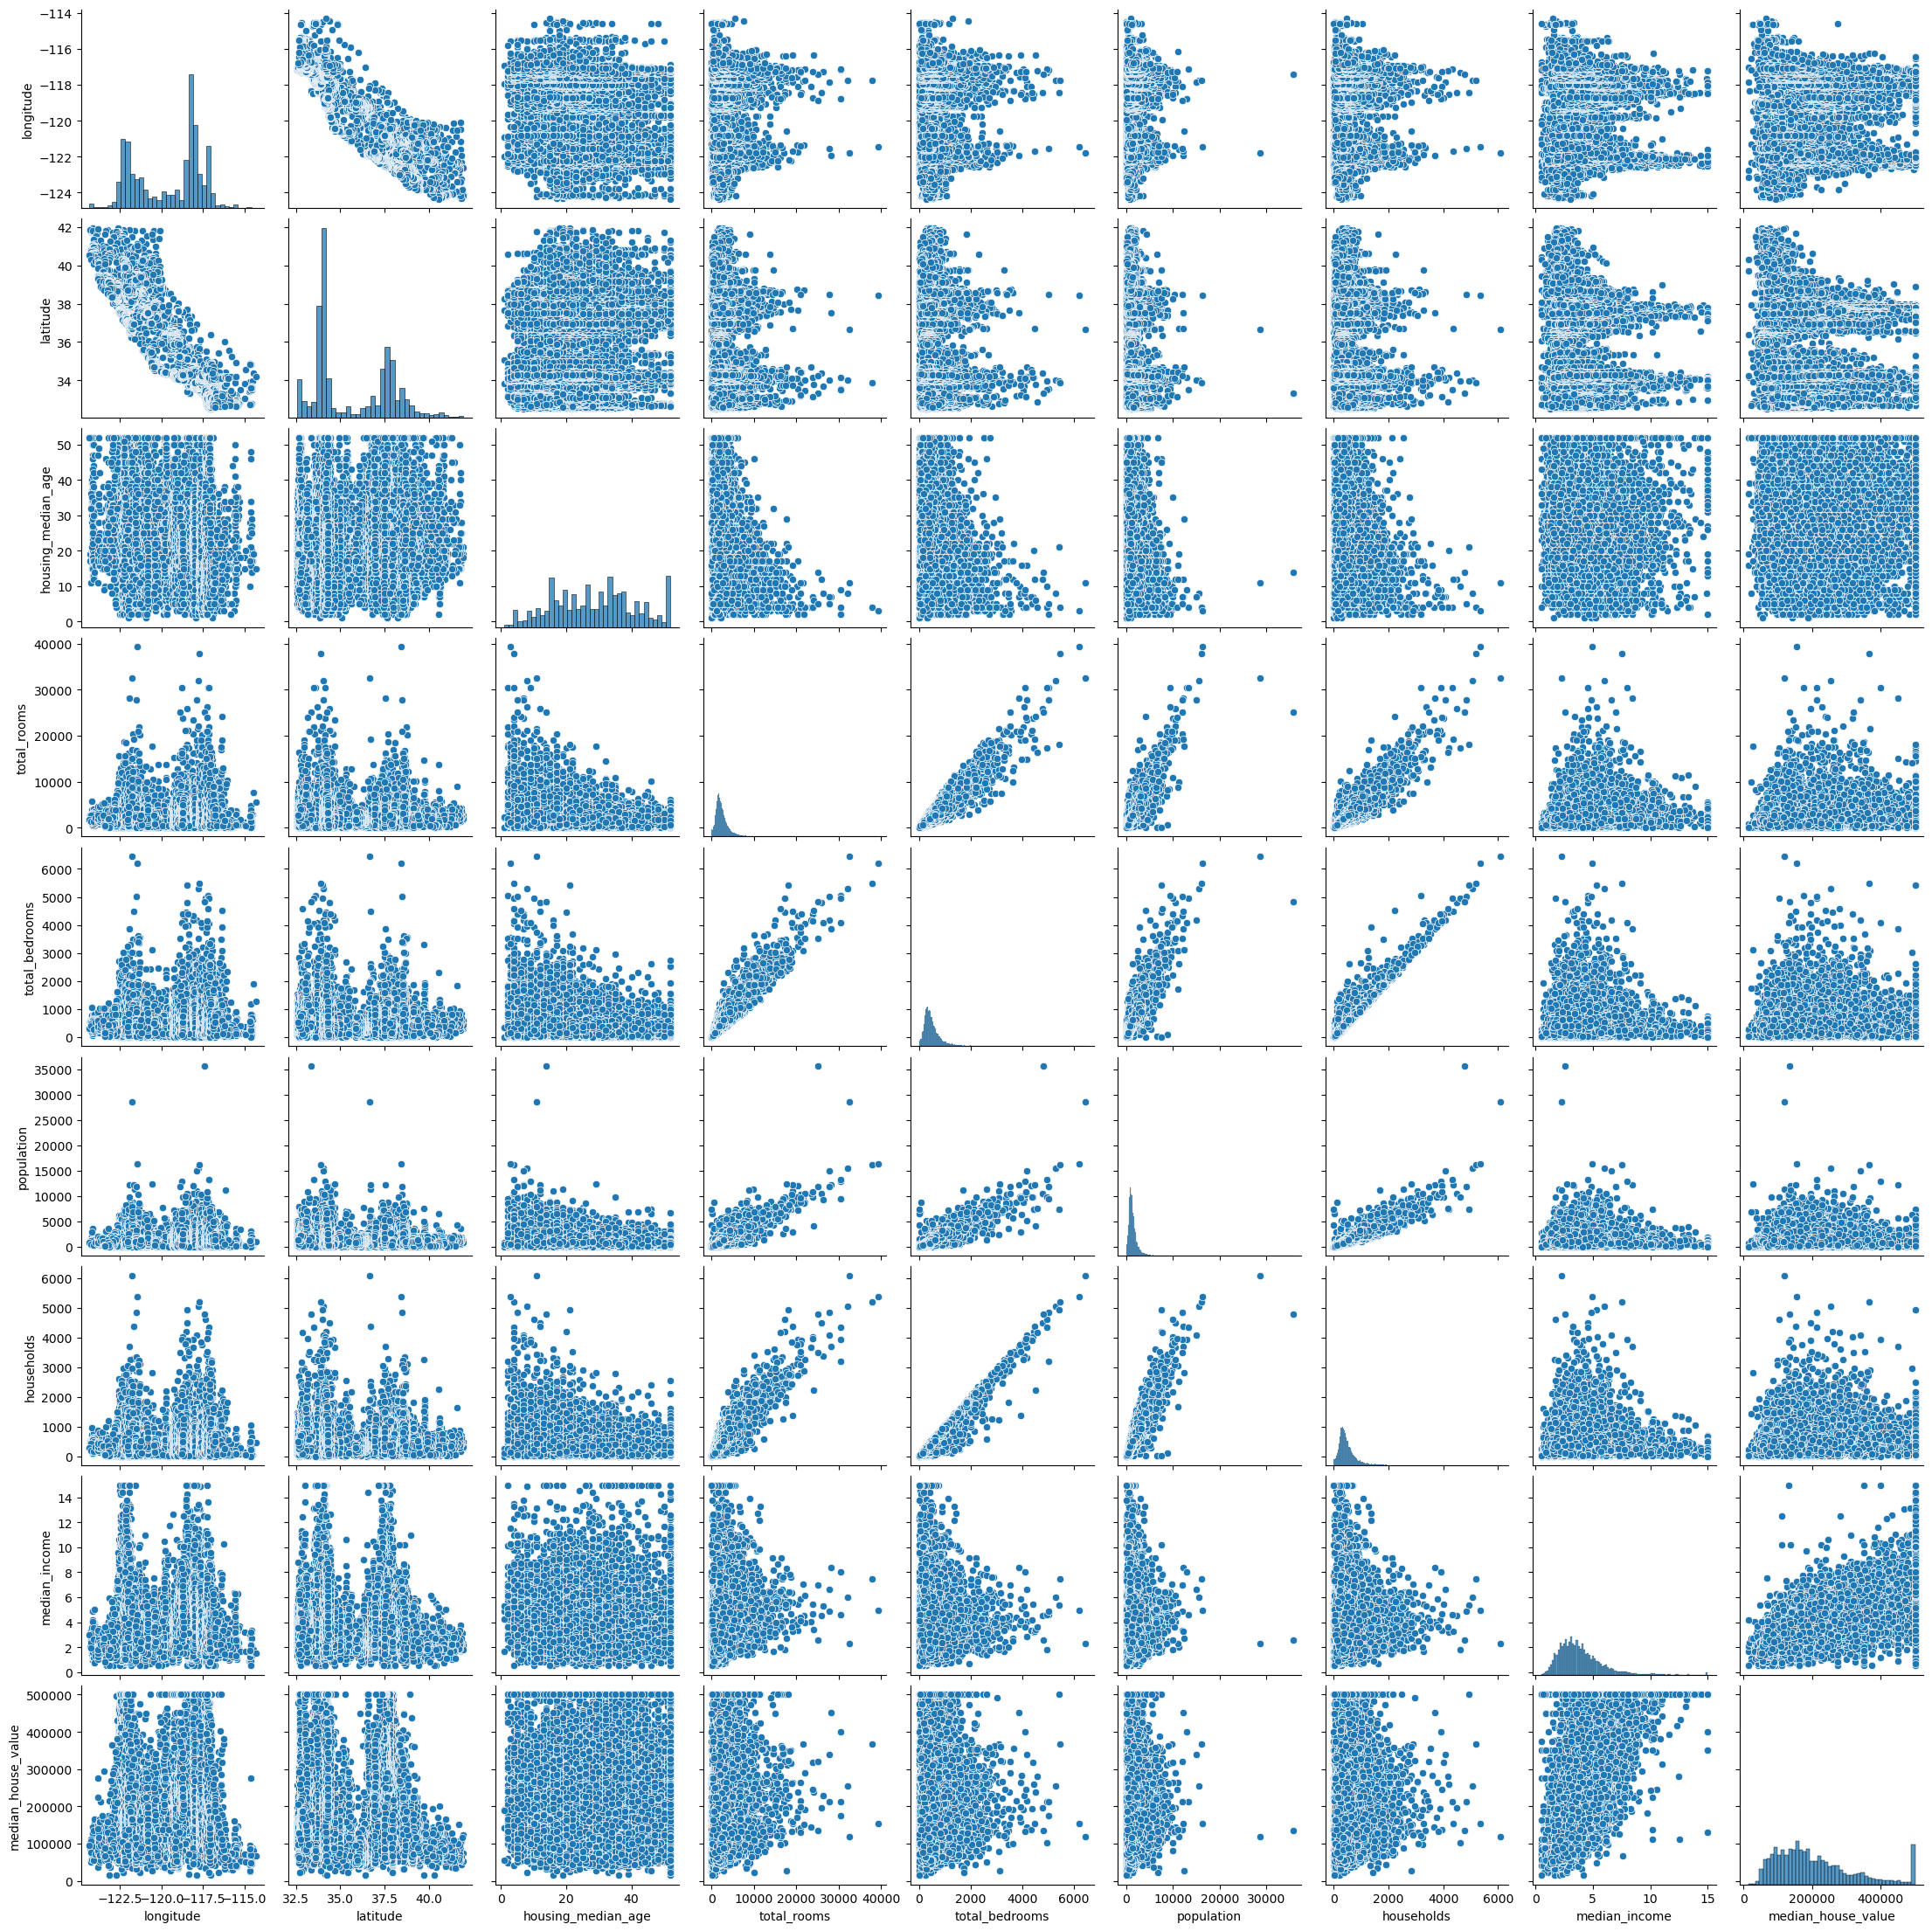

In [14]:
sns.pairplot(df_num)
plt.show()

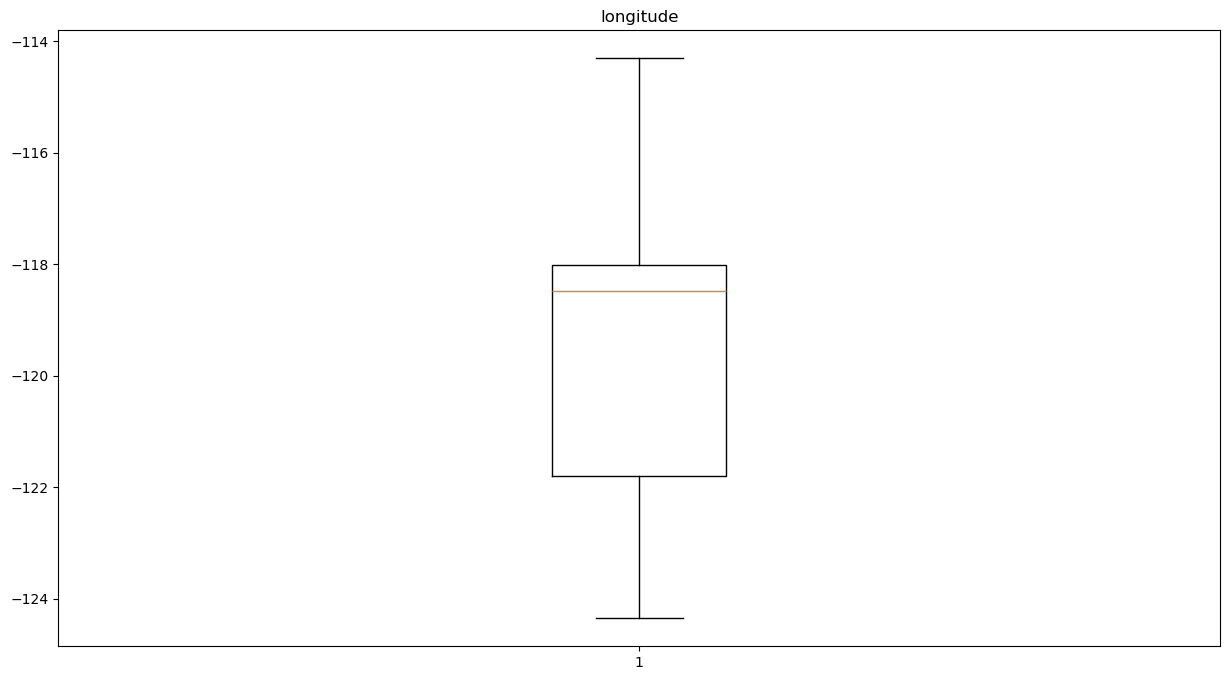

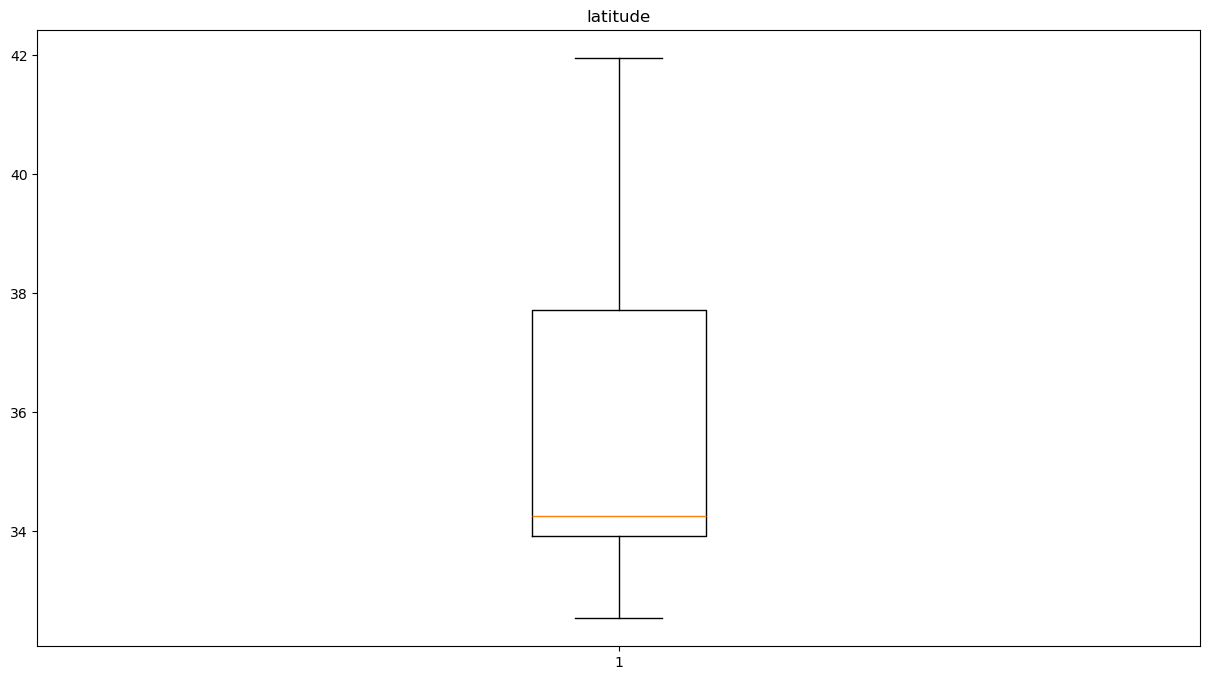

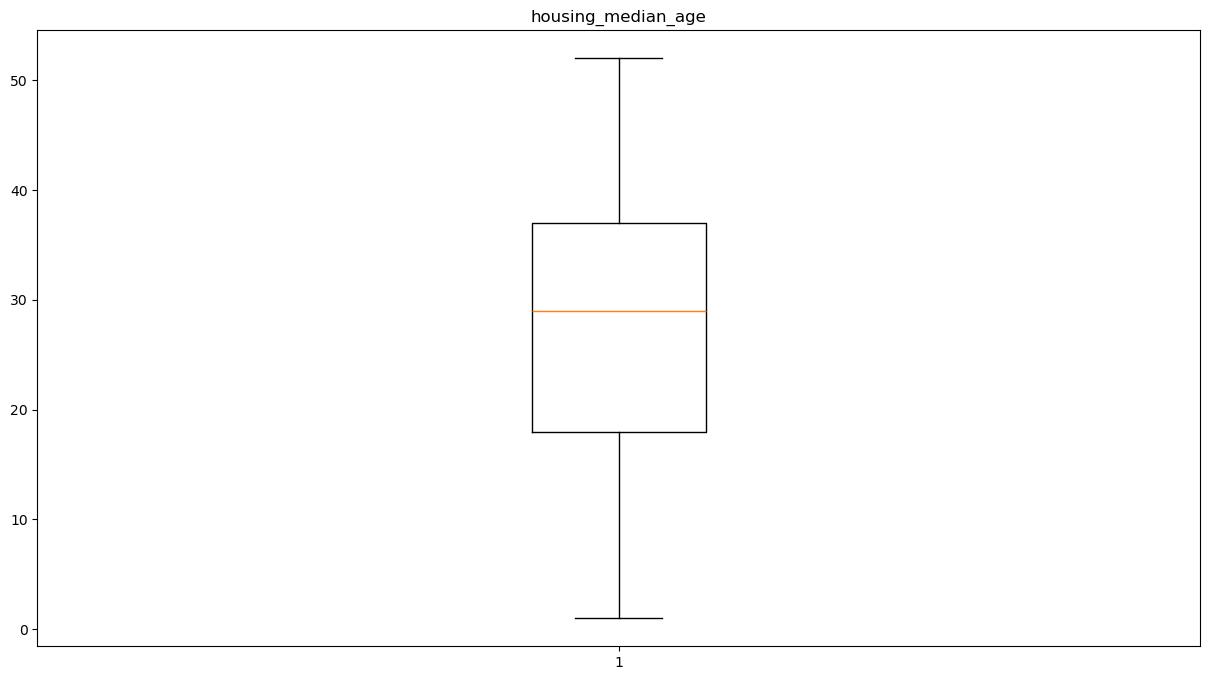

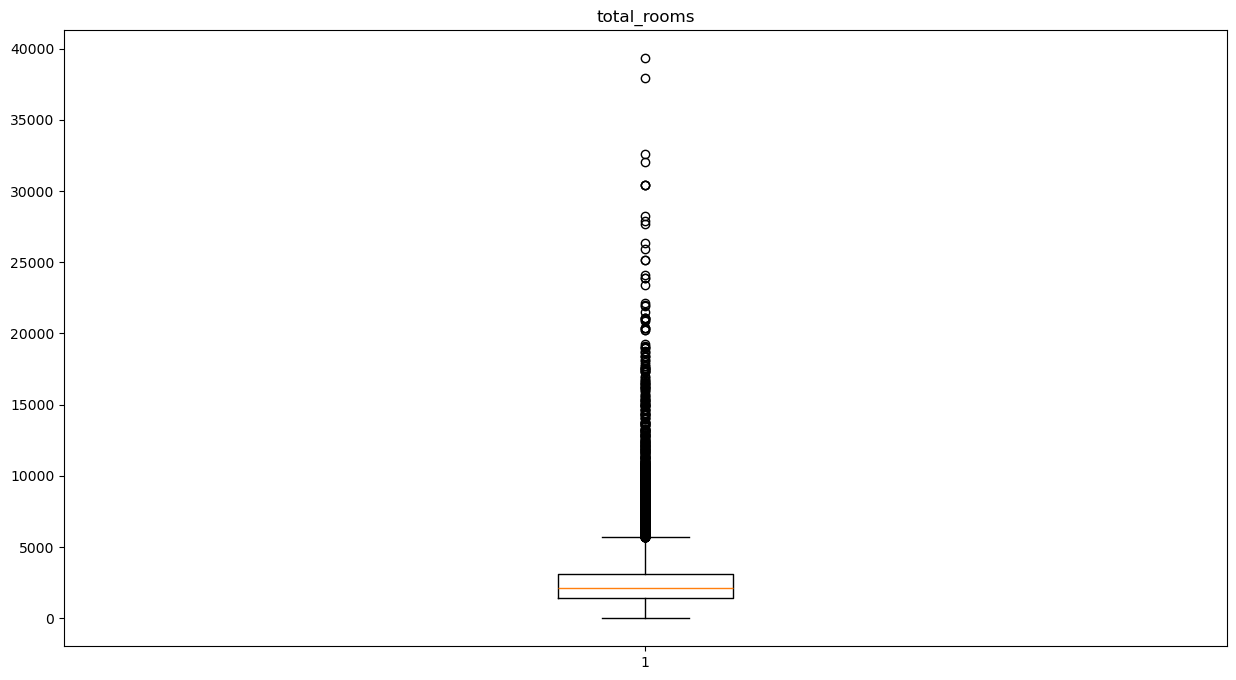

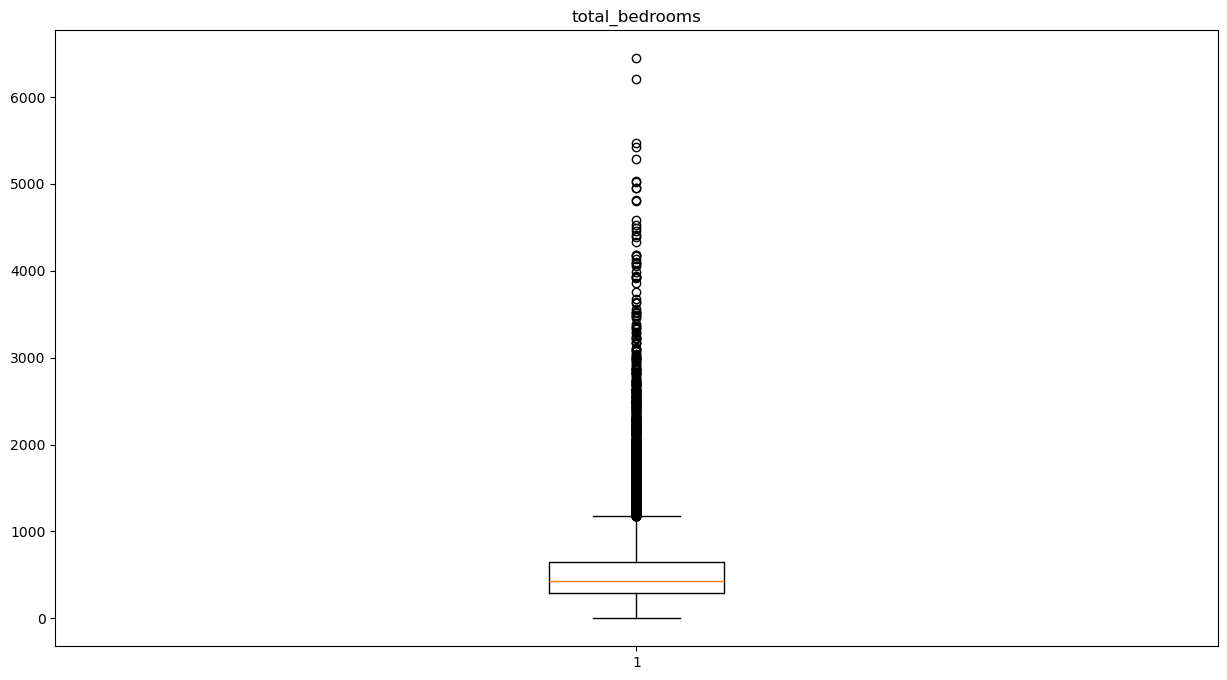

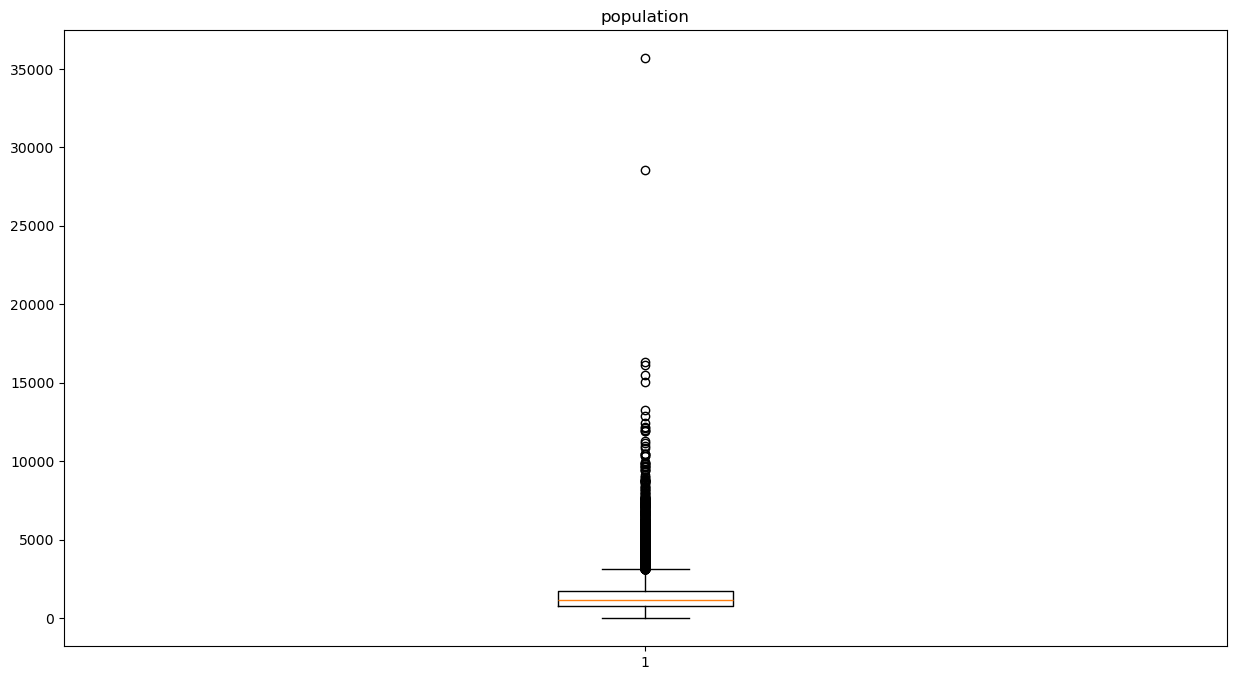

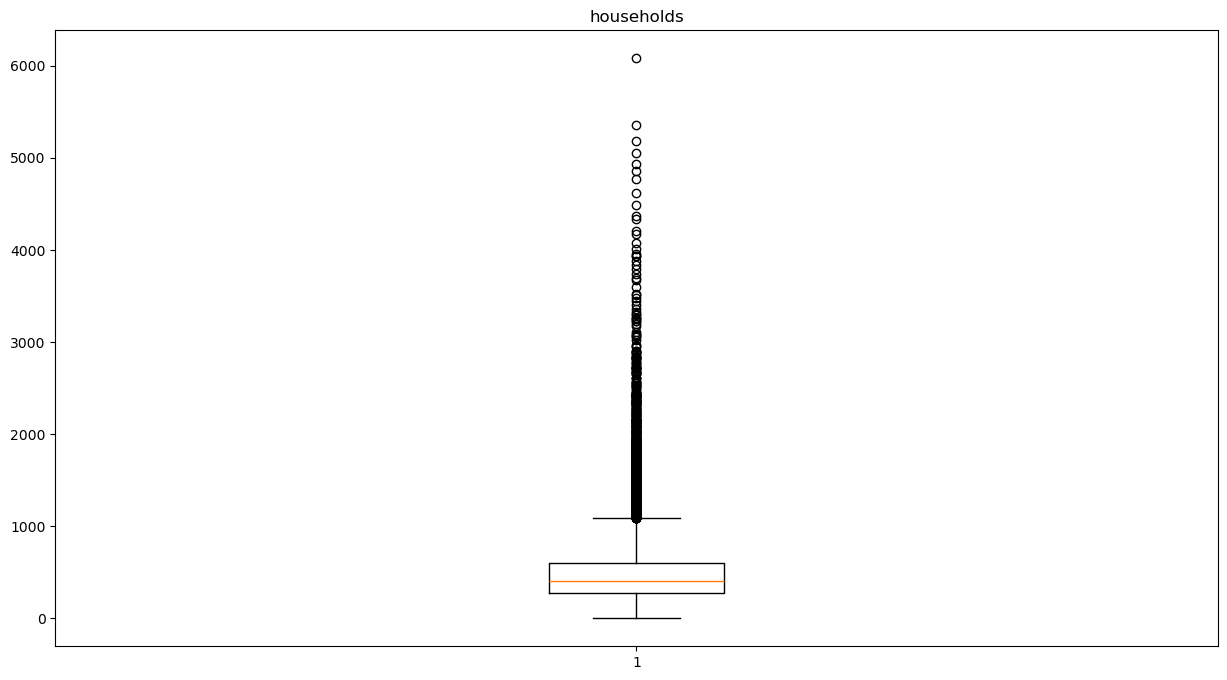

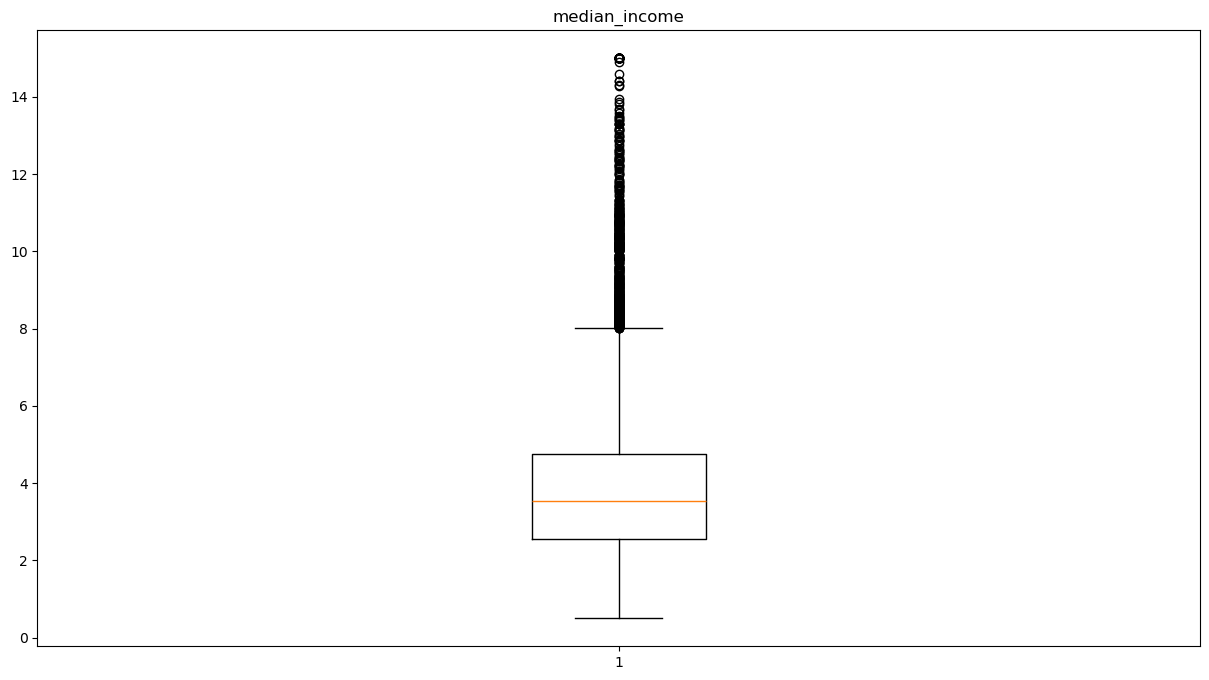

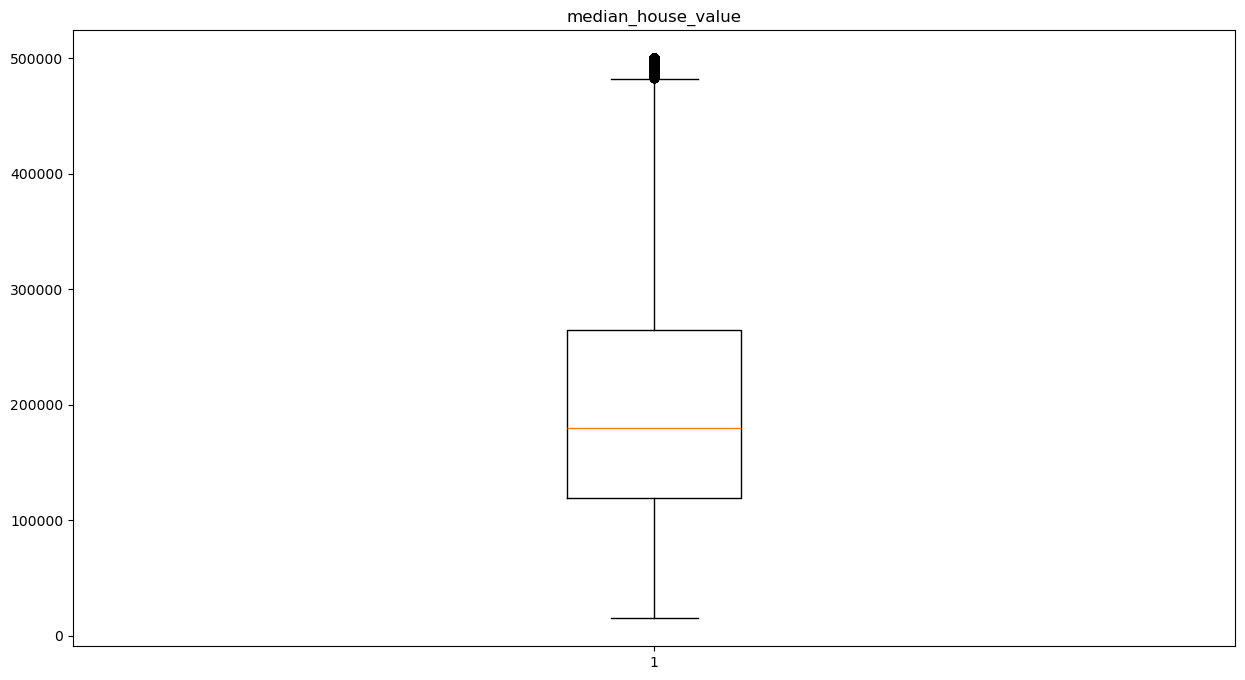

In [15]:
for col in df_num.columns:
    plt.figure(figsize=(15, 8))
    plt.boxplot(df_num[col])
    plt.title(col)
    plt.show()

- Found Outliers in ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

In [16]:
for col in df_num.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    df_num[col] = df_num[col].clip(lower=lower, upper=upper)

- Handled outliers, Capping, Flooring

In [17]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
df_normalized = pd.DataFrame(normalizer.fit_transform(df_num), columns=df_num.columns, index=df_num.index)

- Normalized all values

In [18]:
df_encoded = pd.get_dummies(df_cat['ocean_proximity'], drop_first=True, dtype='int')

In [19]:
df = pd.concat([df_num, df_encoded], axis=1)

In [20]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.01445,452600.0,0,0,1,0
1,-122.22,37.86,21.0,5682.5,1106.0,2401.0,1090.0,8.01445,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.25740,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.64310,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.84620,342200.0,0,0,1,0


- Encoded Categorical Values

#### Splitting the data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

print(X.shape)
print(y.shape)

(20433, 12)
(20433,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
y_pred = model.predict(X_test)

#### Evaluating Linear Regression

In [27]:
from sklearn.metrics import r2_score, mean_squared_error,root_mean_squared_error

In [28]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(r2)
print(mse)
print(rmse)

0.6661146285983767
4396983017.644114
66309.75054729216


### Polynomial Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly = PolynomialFeatures(degree=3)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [31]:
model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
y_pred_poly = model.predict(X_test_poly)

#### Evaluating Polynomial Regression

In [33]:
r2 = r2_score(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = root_mean_squared_error(y_test, y_pred)

print(r2)
print(mse)
print(rmse)

0.7513382791479778
3274660878.776036
66309.75054729216


### Ridge Regression

#### Standardization

- Standardization is an important step before L2 Regularization

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### L2 Regularization

In [35]:
from sklearn.linear_model import Ridge

In [36]:
ridge = Ridge(alpha=1)
ridge.fit (X_train_scaled, y_train)

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [37]:
y_pred_ridge = ridge.predict(X_test_scaled)

#### Evaluating Ridge Regression

In [38]:
r2 = r2_score(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = root_mean_squared_error(y_test, y_pred_ridge)

print(r2)
print(mse)
print(rmse)

0.6666280944643839
4390221114.049788
66258.74367998376


- After adjusting alpha value we are getting 66258 at alpha = 1
- Our aim is to get model good performance by adjusting alpha value

### Lasso Regression

- Applied Standardization (important)

#### L1 Regularization

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lasso = Lasso(alpha=3.2)

lasso.fit(X_train_scaled, y_train)

,alpha,3.2
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [41]:
y_pred_lasso = lasso.predict(X_test_scaled)

#### Evaluating Lasso Regression

In [42]:
r2 = r2_score(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = root_mean_squared_error(y_test, y_pred_lasso)

In [43]:
print(r2)
print(mse)
print(rmse)

0.6666259142804316
4390249825.196291
66258.96033893296


- After adjusing the alpha value we are getting 66258 at alpha=3.2

### Insights

After analysing using different linear regression techniques, we can see that polynomial regression is giving